<a href="https://colab.research.google.com/github/woodstone10/data-collection/blob/main/web_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Crawling - Google Finance

---
"company name" and "stock price" from Google finance (https://www.google.com/finance/)

using Google Chrome > Options > More tools > Developer tools

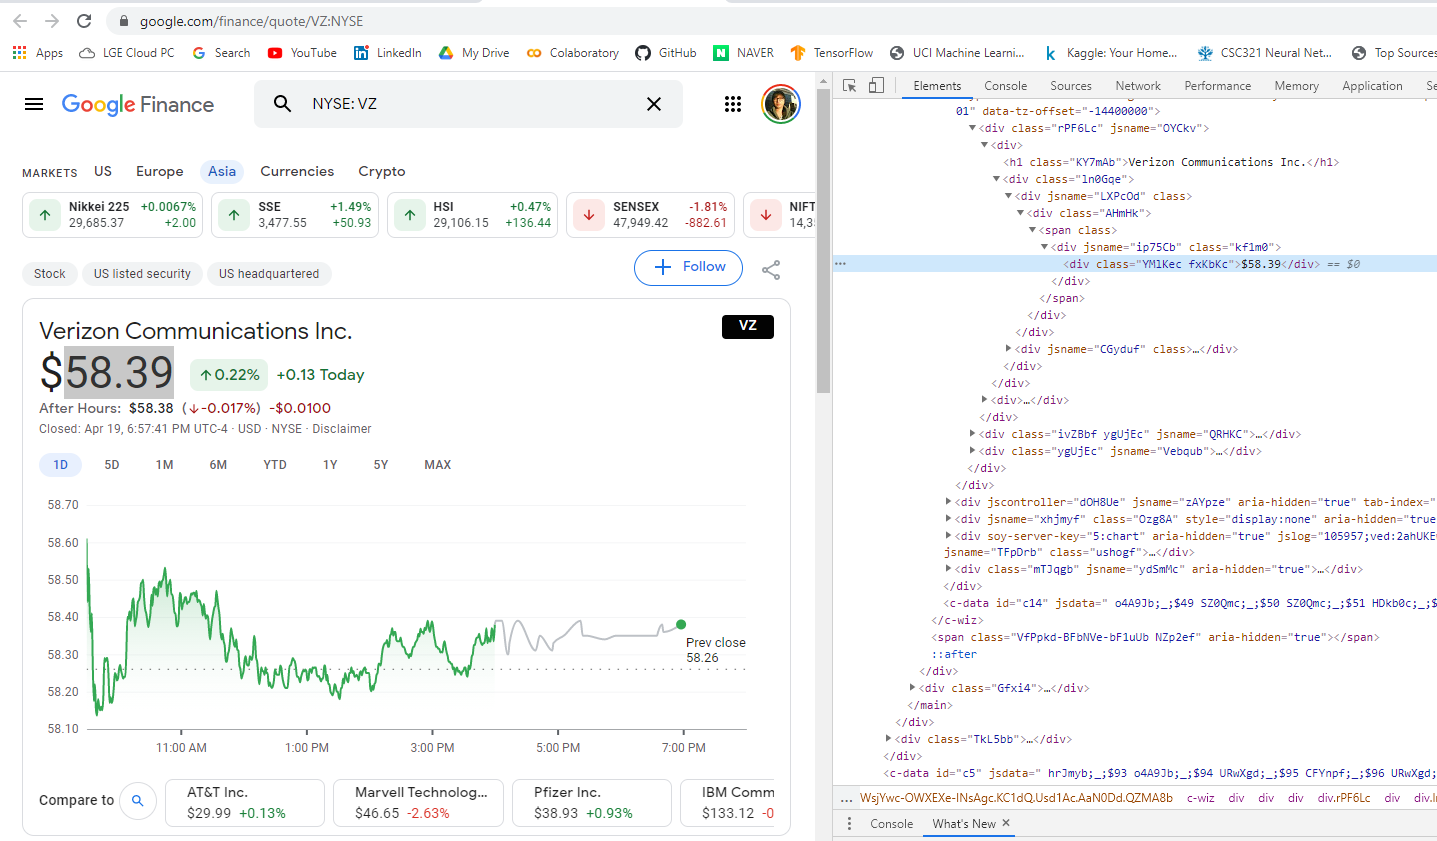

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def crawl(url):
    try:
        rData = requests.get(url)  
        print(rData)  # expect Response [200]
        return rData.content
    except:
        print("<Response Error>")
        return 0

def parse(str):
    bsData = BeautifulSoup(str, "html.parser")  
    name = bsData.find("h1", {"class": "KY7mAb"})  # < h1 class ="KY7mAb" > Company name < / h1 >
    price = bsData.find("div", {"class": "YMlKec fxKbKc"})  # <div class="YMlKec fxKbKc">Price $xx.xx</div>
    return {"name": name.text, "price": price.text}

In [ ]:
url = ["https://www.google.com/finance/quote/VZ:NYSE",  # Verizon
    "https://www.google.com/finance/quote/QCOM:NASDAQ",  # Qualcomm
    "https://www.error",  # wrong page for error handling test purpose
    ]

for i in range(len(url)):
    str = crawl(url[i])
    if str == 0:
        continue
    txt = parse(str)
    name = txt.get("name")
    price = txt.get("price")
    print(name, ":", price)

<Response [200]>
Verizon Communications Inc. : $58.39
<Response [200]>
QUALCOMM, Inc. : $135.25
<Response Error>
